In [76]:
# import necessary libraries

# loading and reading data
import numpy as np
import pandas as pd

# libraries for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox

import warnings

In [77]:
# load the data set(maternal_health data)

df = pd.read_csv('Maternal Health Risk Data Set.csv')


In [78]:
# Check the first 5 columns of the data set
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


### Data Features explanation
|Feature	|Description	                                                                    |Unit      |
|-----------|-----------------------------------------------------------------------------------|----------|
|Age	    |Ages in years when a woman is pregnant	                                            |          |
|SystolicBP	|Upper value of Blood Pressure                                                      |mmHg      |
|DiastolicBP|Lower value of Blood Pressure	                                                    |mmHg      |
|BS	        |Blood glucose levels is in terms of a molar concentration	                        |mmol/L    |
|BodyTerm	|Bodytemperature	                                                                |Fahrenheit|
|HeartRate	|A normal resting heart rate	                                                    |bpm       |
|RiskLevel	|Predicted Risk Intensity Level during pregnancy considering the previous attribute |          |	


## 1. Data Overview

- Data Stucture
- Data Quality check
- Data Descriptive analysis

### 1.1 Data Structure

| Task           | Objective                                             |
|----------------|-------------------------------------------------------|
| Data Dimension | To know the number of columns and rows of the dataset |
| Data Types     | To verify that the data types align with the features |
| Data Columns   | To list and understand the columns                    |


### 1.1.0 Data Structure code line

In [79]:
# checking the dimensionality of the data set
print(f" Data set Dimensions: {df.shape}")

print('---------------------------------------')
# Checking the data types
print(f" Data types:\n{df.dtypes}")

print('----------------------------------------')
# check the data columns
print(f" Data columns: {df.columns}")


 Data set Dimensions: (1014, 7)
---------------------------------------
 Data types:
Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object
----------------------------------------
 Data columns: Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


### 1.2 Data Quality Check

| Task        |Objective                                              |
|-------------|-------------------------------------------------------|
|missing value| identify missing data and understand its extent       |
|Data Range   | verify numerical data is within expected bounds       |

### 1.2.1 Code for Data Quality Check

In [80]:
# check for missing value
print(f"missing value: {df.isnull().sum()}")

print('----------------------------------------')
# check for data range and validity
num_columns = df.select_dtypes(include=['number']).columns
for col in num_columns:
    print(f"{col}: min = {df[col].min()}, max = {df[col].max()}")




missing value: Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
----------------------------------------
Age: min = 10, max = 70
SystolicBP: min = 70, max = 160
DiastolicBP: min = 49, max = 100
BS: min = 6.0, max = 19.0
BodyTemp: min = 98.0, max = 103.0
HeartRate: min = 7, max = 90


### 1.3 Data descriptive analysis

| Task                             | Objective                                                                          |
|----------------------------------|------------------------------------------------------------------------------------|
|statistics of numerical features  | quick overview of the distribution and central tendencies of the numerical features|
|statistics of categorical features| understand class distribution of categorical variable                              |

### 1.3.1 Code for Data Statistics distribution

In [81]:
# check the summary statistics of numerical features
print('The summary Statistics of numerical features:')
df.describe()

The summary Statistics of numerical features:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [82]:
# check the summary statistics of the class distribution of the target variable
print(df.describe(include='object'))
# Value counts for categorical features
print("\nCategorical Data Insights:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col} frequency:")
    print(df[col].value_counts())



       RiskLevel
count       1014
unique         3
top     low risk
freq         406

Categorical Data Insights:
RiskLevel frequency:
low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64


### 1.3.1 Further analysis on the numerical features

In [83]:
# Skewness and Kurtosis
print("\nSkewness and Kurtosis:")
for col in df.select_dtypes(include=['number']).columns:
    skewness_value = round(df[col].skew(),2)
    kurtosis_value = round(df[col].kurt(),2)
    print(f"{col}: Skewness = {skewness_value}, Kurtosis = {kurtosis_value}")


Skewness and Kurtosis:
Age: Skewness = 0.78, Kurtosis = -0.39
SystolicBP: Skewness = -0.25, Kurtosis = -0.61
DiastolicBP: Skewness = -0.05, Kurtosis = -0.95
BS: Skewness = 1.87, Kurtosis = 2.3
BodyTemp: Skewness = 1.75, Kurtosis = 1.45
HeartRate: Skewness = -1.04, Kurtosis = 8.4


 - Explanation of Skewness
 1) Age, BS, BodyTemp: positvely skewed, suggesting the presence of higher values pulling the tail of the distribution to the right
 2) HeartRate: Negatively skewed which indicates some low values extending the tail to the left.
 
 - Explanation of Kurtosis
 1) BS, BodyTemp, HeartRate: High positve kurtosis which indicates some extreme values or presence of outliers
 2) Age, SystolicBP, DiastolicBP: Negative kurtosis which suggests a flatter distribution with minimum outliers

## 2. Enhancement of Data
- Additional columns will be created using existing features:
1) Mean Arterial Pressure(MAP): The MAP helps in monitoring hypertension and ensuring adequate organ perfusion during pregnancy
2) Pulse Pressure(PP): Provides insights into the arterial stiffness and cardiovascular risk.

- new column of a numerical data type for the RiskLevel feature will be created 

### 2.1 Code for Enhancement of Data

In [84]:
# Calculate the Mean Arterial Pressure(MAP)
df['MAP'] = round((df['SystolicBP'] +2 * df['DiastolicBP'])/3,2)

# Calculate Pulse Pressure (PP)
df['Pulse'] = df['SystolicBP'] - df['DiastolicBP']


# checking the enhanced data set
print('\nEnhanced Data set')
df.head(5)


Enhanced Data set


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,MAP,Pulse
0,25,130,80,15.0,98.0,86,high risk,96.67,50
1,35,140,90,13.0,98.0,70,high risk,106.67,50
2,29,90,70,8.0,100.0,80,high risk,76.67,20
3,30,140,85,7.0,98.0,70,high risk,103.33,55
4,35,120,60,6.1,98.0,76,low risk,80.00,60


## 3. Exploratory Data Analysis(EDA)
- **EDA** is a vital step in the data analysis process and it involves summarizing a dataset's main characteristics using visuals.
it's importance includes:
1) understand the data structure
2) detect patterns and anomalies
3) formuate hypothesis for further analysis

### 3.1. Univariate analysis on the target variable distribution
- **Bar plot:** to visualize the count of each class
- **Pie chart:** to visualize the percentage distribution of each class

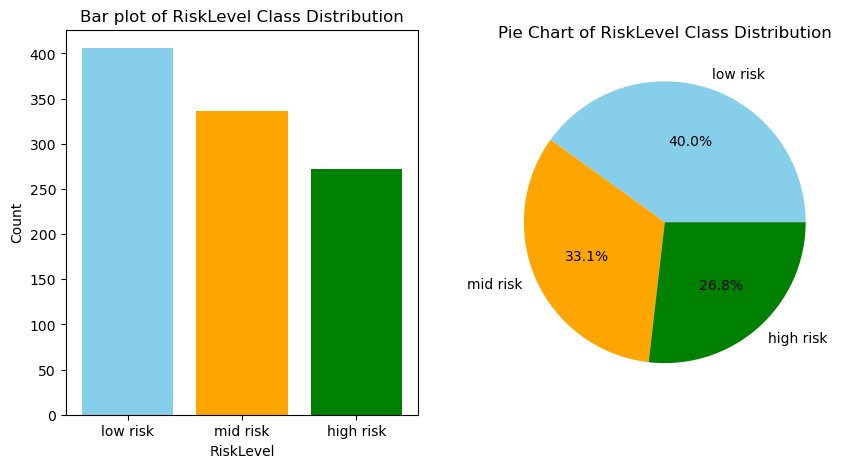

In [85]:
# Calculate the class distribution
class_dis = df['RiskLevel'].value_counts()

# create subplots for bar plot and pie chart
fig, ax = plt.subplots(1,2, figsize=(10,5))

# Bar Chart
ax[0].bar(class_dis.index, class_dis.values, color=['skyblue', 'orange', 'green'])
ax[0].set_title('Bar plot of RiskLevel Class Distribution')
ax[0].set_xlabel('RiskLevel')
ax[0].set_ylabel('Count')


# Pie Chart
ax[1].pie(class_dis.values, labels=class_dis.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'])
ax[1].set_title('Pie Chart of RiskLevel Class Distribution')

# To display plot
plt.show();

***RiskLevel Class plot observation***

- The above plots suggest our target variable RiskLevel has low risk of 40%, mid risk of 33.1% and high risk of 26.8%.
This clearly indicates a class inbalance among our target variable.

### 3.2. Correlation heat map of the features
- The heatmap is used to visualize the relationship between numerical features in the dataset
- **+1.0:** indicate perfect positive relation. positive values means as one feature increases, the other tends to increase too
- **-1.0:** indicate perfect negative relation. negative values means as one feature increases, the other decrease
- **0.0:** means no relation. suggesting the features has no linear relationship(no dependence)

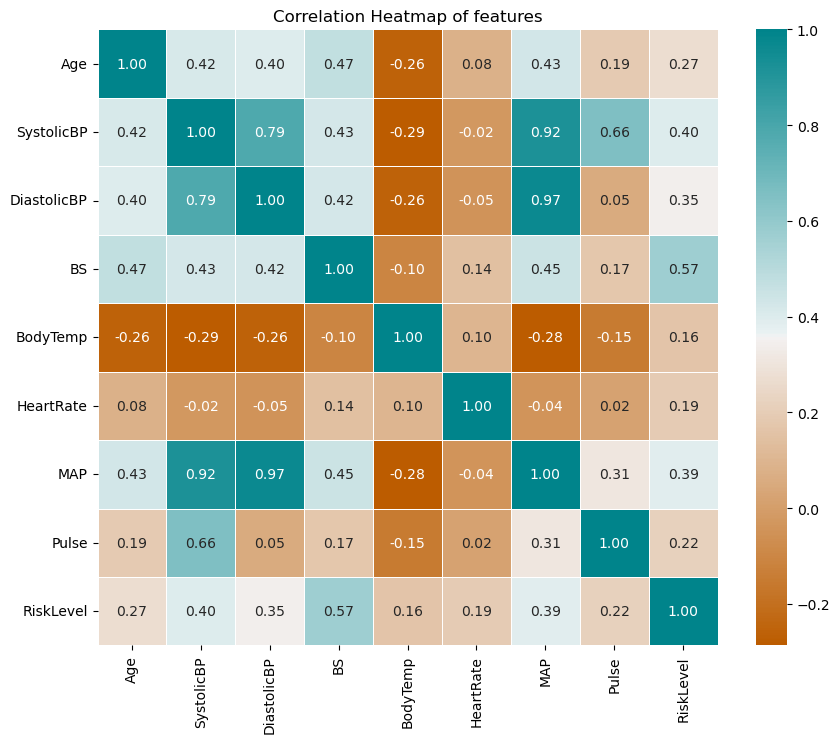

In [86]:
# Map the Target Variable
Risk = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df['RiskLevel'] = df['RiskLevel'].map(Risk).astype(float)

# Calculate the correlation matrix
corr_matrix = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'MAP', 'Pulse', 'RiskLevel']].corr()

# set the colors for the heatmap
custom_palette = sns.diverging_palette(30, 200, s=100, l=50, n=400, center="light")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap= custom_palette, cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of features')
plt.show();



***Corelation heatmap key observations***

- **features with strong positve correlations:**
    - **SystolicBP and DiastolicBP**  
    - **MAP with systolicBP and DiastolicBP**. This relationship aligns with its calculation method
    
- **features with moderate positive correlations:**
    - **Age with BS (0.47) and MAP (0.43)**
    - **Pulse with SystolicBP (0.66)**
    - **RiskLevel_num with BS (0.57) and MAP(0.39):** suggests these features are important for predictingn risk levels.

- **Low correlation:**
    - **BodyTemp and HeartRate:** shows low correlation with other features, suggesting independence on other features.

### 3.3. Visualizing skewness using Histogram

- **Skewness** measures how evenly spread the bell curve  on data points is on both sides of the median. if the spread is tilted more to the left than the right, it is said to be negatively skew and positively skewed if tilted more to the right than to the left. The data points is said to be zero symmetric if the bell shape have an even distribution on both sides

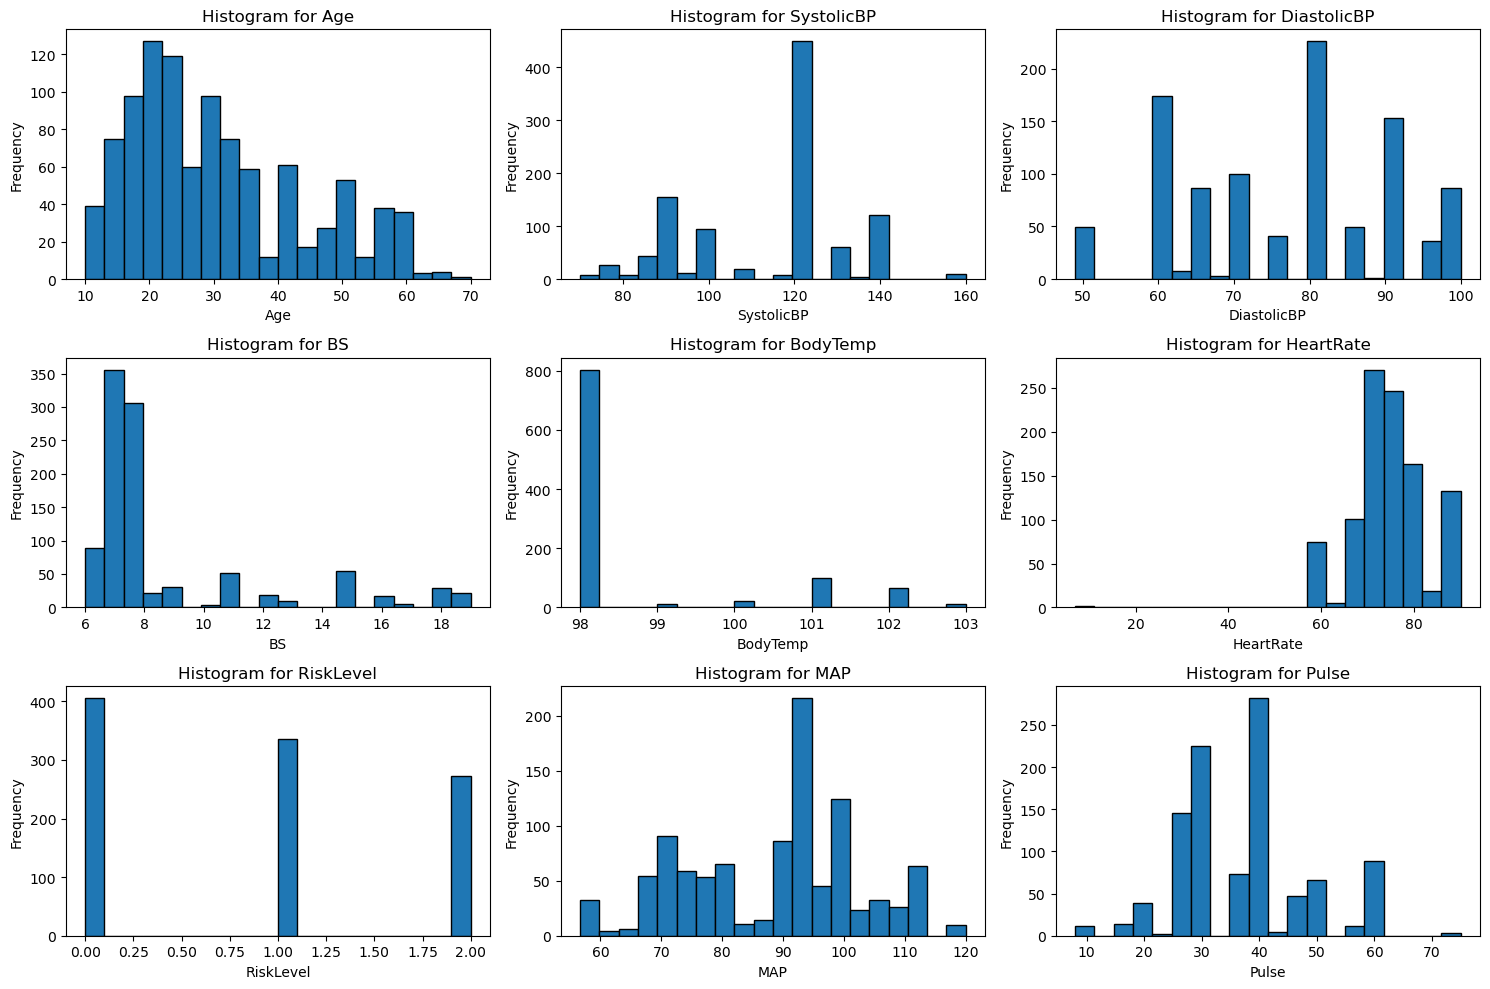

In [87]:
# Visualize skewness using histogram for each numerical feature

num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[column].dropna(), bins=20, edgecolor='k')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


***Histogram Observation***


- From the above it is seen that HeartRate, BS and Body Temp are highly skewed. HeartRate is negative skewed while the BS and Body Temp are positively skewed.Other features such as Age and Pulse are moderately skewed. Diastolic, systolic and MAP are approximately symmetric

### 3.5. Box plot for visualizing presence of outliers

- The presence of outliers in a dataset can significantly impact model performance as extreme values or very low values can affect our model ability to classify instances and potentially leading to poor generalization and bias.

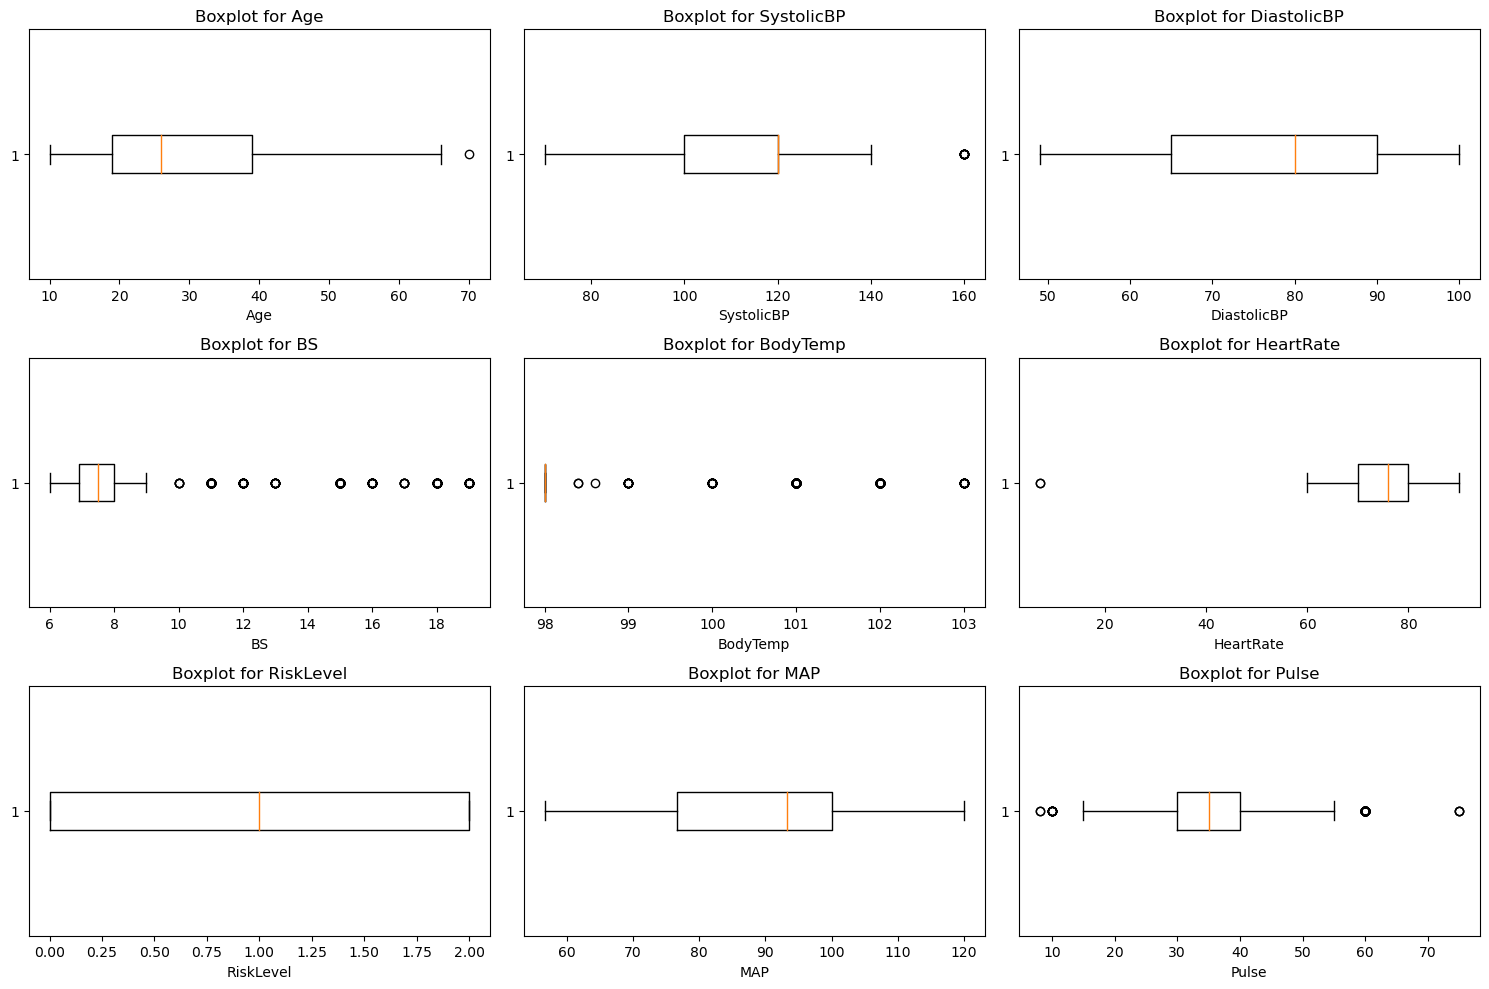

In [88]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

***Box plot observation***

- BS and BodyTemp have the highest number of outliers, indicating that they contain values that are either extremely high or extremely low compared to the concentration of other data points.

### 3.3. Pairwise plot between demographic feature and Blood pressure related features

<Figure size 1000x1000 with 0 Axes>

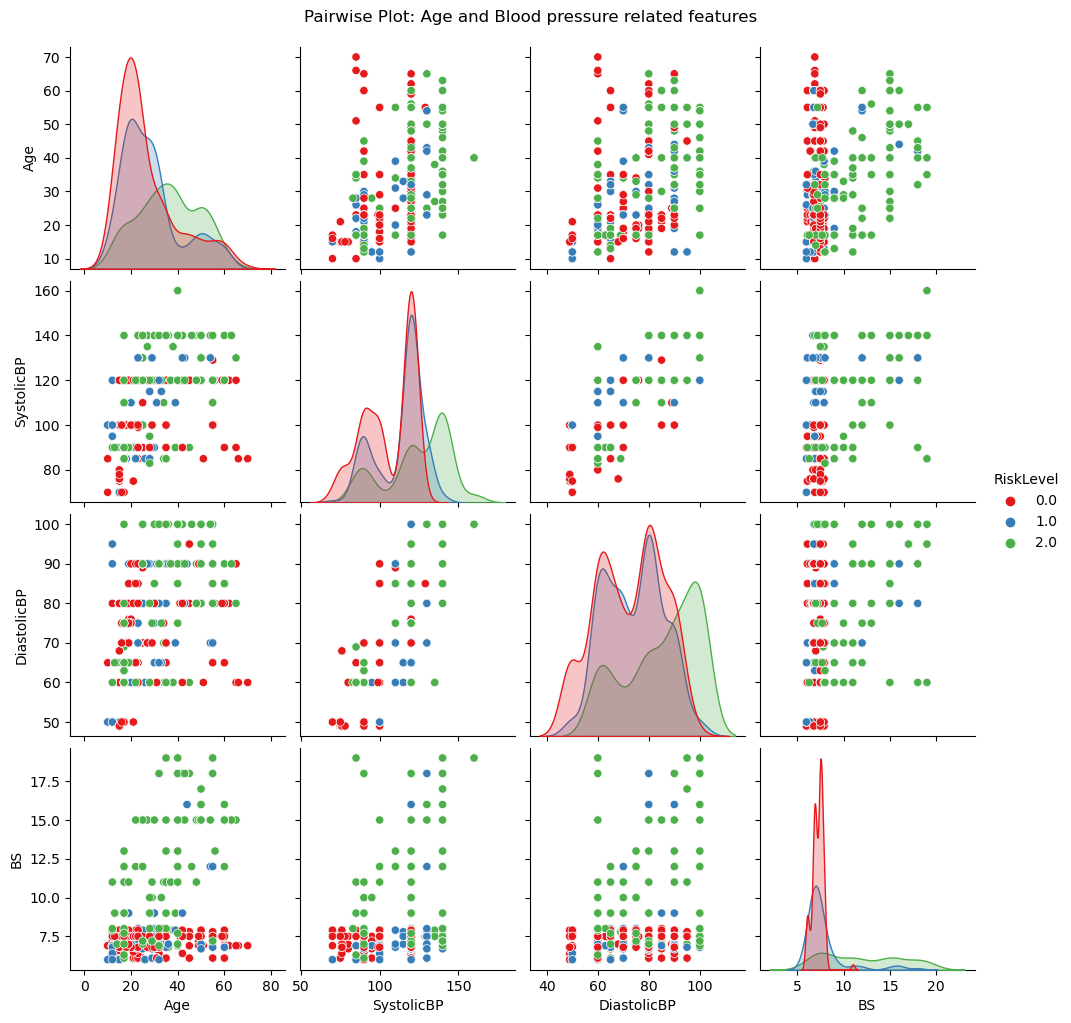

In [89]:
# Define feature sets
features_1 = ['Age', 'SystolicBP', 'DiastolicBP', 'BS']

# Pairwise plot 
plt.figure(figsize=(10, 10))
sns.pairplot(df, vars=features_1, hue='RiskLevel', palette='Set1')
plt.suptitle('Pairwise Plot: Age and Blood pressure related features', y=1.02)
plt.show();


### 3.4. Pairplot of some physiological features

<Figure size 1000x1000 with 0 Axes>

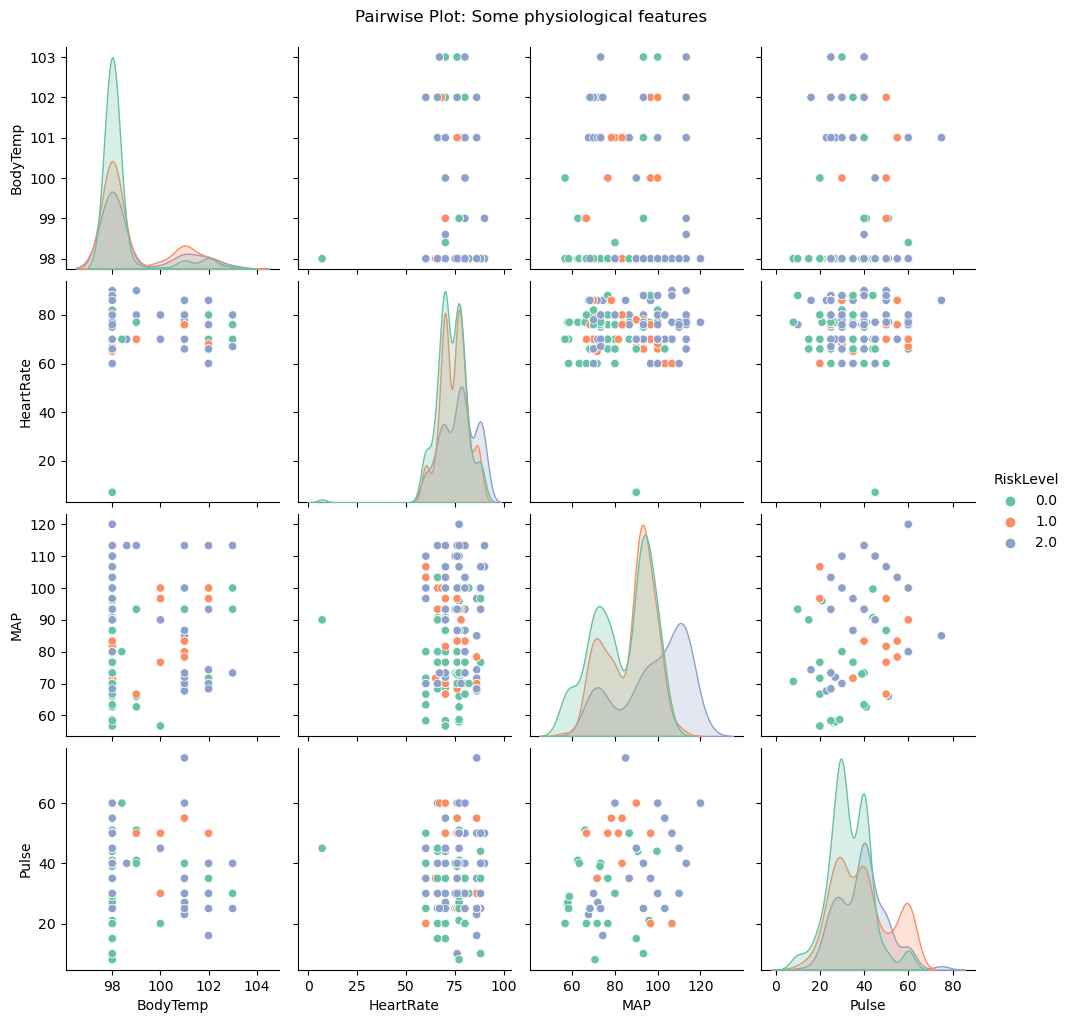

In [90]:
# Define feature sets
feature_2 = ['BodyTemp', 'HeartRate', 'MAP', 'Pulse']

# Pairwise plot for Set 2
plt.figure(figsize=(10, 10))
sns.pairplot(df, vars=feature_2, hue='RiskLevel', palette='Set2')
plt.suptitle('Pairwise Plot: Some physiological features', y=1.02)
plt.show();

## 4. Data Preprocessing
- It is essential to preprocess the data so as to ensure that the data is clean, well-formatted, and ready for model training.
This process when carefully done leads to more accurate and reliable results.

- **The following preprocessing will be applied:**
    - **identify and handle anomalies if any**
    - **Scale and standardize features**
    - **Segment Data**
    - **Split data**
    

### 4.1 Identify and handle anomalies(where applicable)
- **Missing Value**: Will check and treat missing values where it exist
- **Encoding** will check for categorical data and encode where it exist
- **Skewness and outliers**: will check for skewness and outliers and where it exist, will apply appropriate transformation techniques.
    This is to ensure that the features are more symmetric and lower the effect of extreme values on our model performance

In [91]:
# check for missing data.
def missing_values(df):
    '''
    checks for missing values
    
    paramaters:
    df: the dataframe to check
    
    Returns:
    The result of our checks.
    '''
    missing_count = df.isnull().sum()
    
    # Print the summary
    if missing_count.sum() == 0:
        print("No missing values found.")
    else:
        print("Missing values summary:")
        print(missing_count[missing_cout > 0])
        
    return missing_count

#using our function to check for missing values
missing_count = missing_values(df)



No missing values found.


In [92]:
# check for categorical data
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel      float64
MAP            float64
Pulse            int64
dtype: object

- The data types are good to be used for modeling. Mapping was used to assign numerical values to the RiskLevels

In [93]:
# check for skewness
skewness = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'MAP', 'Pulse']].skew()
print("Skewness of Numerical Features:")
print(skewness)

Skewness of Numerical Features:
Age            0.783063
SystolicBP    -0.251189
DiastolicBP   -0.048441
BS             1.868203
BodyTemp       1.750988
HeartRate     -1.043525
MAP           -0.162094
Pulse          0.468788
dtype: float64


***Observations from checks for anomaly***.
- No missing data was detected
- The data entries are in numerical form and as such no need for encoding
- The BodyTemp, HeartRate and BS are highly skewed and will need to be normalized to improve model performance.

### 4.12.Transformation mechanics on the skewed features

In [94]:
skewed_features = ['BS', 'BodyTemp', 'HeartRate']

# Ensure no zero or negative values by adding a small constant
def add_constant(df, features):
    for feature in features:
        if any(df[feature] <= 0):
            df[feature] = df[feature] + 1 - df[feature].min()
    return df

# Add constant
boxcox_df = add_constant(df.copy(), skewed_features)

# Suppress warnings for clearer output
warnings.filterwarnings('ignore')

# Apply Box-Cox transformation to skewed features
boxcox_df_trans = boxcox_df.copy()
for feature in skewed_features:
    boxcox_df_trans[feature], _ = boxcox(boxcox_df[feature])

# Recalculate skewness after Box-Cox transformation
boxcox_df_trans_skew = boxcox_df_trans.skew()
print("\nSkewness of Numerical Features after Box-Cox Transformation:")
print(boxcox_df_trans_skew)




Skewness of Numerical Features after Box-Cox Transformation:
Age            0.783063
SystolicBP    -0.251189
DiastolicBP   -0.048441
BS             0.355775
BodyTemp       0.000000
HeartRate      0.087297
RiskLevel      0.244556
MAP           -0.162094
Pulse          0.468788
dtype: float64


***Observation from transformation mechanics***
- All features are now moderately skewed or approximately symmetric

### 4.2. Segment Data
- **The target variable(Y) will be separated from the dependent variables(X)**
- The target variable is the output our model will aim to predict.
- The dependent variables will be the input our model will use to learn patterns and make predictions.

In [96]:
X = boxcox_df_trans.drop('RiskLevel', axis=1)
y = boxcox_df_trans['RiskLevel']

### 4.3. Scale and Standarize the dependent variables features

- Standardizing our dependent variables ensures that all features are on the same scale. This is crucial for many machine learning algorithm to perform optimally.

In [116]:
from sklearn.preprocessing import StandardScaler

# Initatiate the scaler
scaler = StandardScaler()

# selecting depentent variable to scale

X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Verify standardization
standardized_df = round(X_scaled_df,2)
print("\nMean of standardized features:")
print(standardized_df.mean())
print("\nStandard deviation of standardized features:")
print(standardized_df.std())



Mean of standardized features:
Age            0.000256
SystolicBP     0.000414
DiastolicBP    0.000710
BS            -0.000355
BodyTemp       0.000000
HeartRate     -0.000631
MAP            0.000089
Pulse          0.002771
dtype: float64

Standard deviation of standardized features:
Age            1.000764
SystolicBP     1.000467
DiastolicBP    1.003917
BS             0.999616
BodyTemp       0.000000
HeartRate      1.000656
MAP            1.000274
Pulse          1.000697
dtype: float64


### 4.3. Split Data
- **Train and Test:** Our data will be split into training and testing sets, with 80% used for training and 20% reserved for testing. The 20% test set will be used to evaluate our model's performance on unseen data.
- **Random state:** The random state will be set to a fixed interger. This ensures reproductivity meaning that for every time the code is ran, the split between the training and testing remains the same.
- **Stratification:** stratifying the target variable(y) ensures that the class distribution of the test and train will closely match that of the original data class distribution

In [117]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution of the target variable in the training and testing sets
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("\nTesting set class distribution:\n", y_test.value_counts(normalize=True))

Training set class distribution:
 0.0    0.400740
1.0    0.331689
2.0    0.267571
Name: RiskLevel, dtype: float64

Testing set class distribution:
 0.0    0.399015
1.0    0.330049
2.0    0.270936
Name: RiskLevel, dtype: float64
